In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("4_earthquake_1995-2023.csv")


In [3]:
df.drop(["Unnamed: 0"],axis=1,inplace = True)

In [4]:
df

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,...,gap,magType,depth,latitude,longitude,location,continent,country,date,time
0,"M 6.5 - 42 km W of Sola, Vanuatu",6.5,16-08-2023 12:47,7,4,green,0,657,us,114,...,25.0,mww,192.955,-13.88,167.16,"Sola, Vanuatu",Oceania,Vanuatu,2023-08-16,12:47:00
1,"M 6.5 - 43 km S of Intipucá, El Salvador",6.5,19-07-2023 00:22,8,6,yellow,0,775,us,92,...,40.0,mww,69.727,12.81,-88.13,"Intipucá, El Salvador",North America,El Salvador,2023-07-19,00:22:00
2,"M 6.6 - 25 km ESE of Loncopué, Argentina",6.6,17-07-2023 03:05,7,5,green,0,899,us,70,...,28.0,mww,171.371,-38.19,-70.37,"Loncopué, Argentina",South America,Argentina,2023-07-17,03:05:00
3,"M 7.2 - 98 km S of Sand Point, Alaska",7.2,16-07-2023 06:48,6,6,green,1,860,us,173,...,36.0,mww,32.571,54.38,-160.70,"Sand Point, Alaska",North America,United States,2023-07-16,06:48:00
4,M 7.3 - Alaska Peninsula,7.3,16-07-2023 06:48,0,5,No alert,1,820,at,79,...,172.8,Mi,21.000,54.49,-160.80,Alaska Peninsula,North America,United States,2023-07-16,06:48:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,"M 7.1 - 85 km S of Tungor, Russia",7.1,27-05-1995 13:03,0,9,No alert,0,776,us,0,...,0.0,mwb,11.000,52.63,142.83,"Tungor, Russia",Asia,Russian Federation,1995-05-27,13:03:00
970,"M 7.7 - 249 km E of Vao, New Caledonia",7.7,16-05-1995 20:12,0,4,No alert,0,912,us,0,...,0.0,mw,20.200,-23.01,169.90,"Vao, New Caledonia",Europe,France,1995-05-16,20:12:00
971,"M 6.9 - 27 km NNW of Maubara, Timor Leste",6.9,14-05-1995 11:33,0,6,No alert,0,732,us,0,...,0.0,mw,11.200,-8.38,125.13,"Maubara, Timor Leste",Asia,Indonesia,1995-05-14,11:33:00
972,"M 6.6 - 10 km W of Aianí, Greece",6.6,13-05-1995 08:47,0,9,No alert,0,670,us,0,...,0.0,mw,14.000,40.15,21.70,"Aianí, Greece",Europe,Greece,1995-05-13,08:47:00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      974 non-null    object 
 1   magnitude  974 non-null    float64
 2   date_time  974 non-null    object 
 3   cdi        974 non-null    int64  
 4   mmi        974 non-null    int64  
 5   alert      858 non-null    object 
 6   tsunami    974 non-null    int64  
 7   sig        974 non-null    int64  
 8   net        974 non-null    object 
 9   nst        974 non-null    int64  
 10  dmin       974 non-null    float64
 11  gap        974 non-null    float64
 12  magType    974 non-null    object 
 13  depth      974 non-null    float64
 14  latitude   974 non-null    float64
 15  longitude  974 non-null    float64
 16  location   974 non-null    object 
 17  continent  974 non-null    object 
 18  country    974 non-null    object 
 19  date       974 non-null    object 
 20  time      

In [6]:
df[df["alert"]=="red"]

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,...,gap,magType,depth,latitude,longitude,location,continent,country,date,time
28,M 7.8 - Central Turkey,7.8,06-02-2023 01:17,9,9,red,0,2910,us,118,...,32.0,mww,17.925,37.20,37.00,Central Turkey,Asia,Turkey,2023-02-06,01:17:00
56,"M 7.3 - 57 km ENE of Namie, Japan",7.3,16-03-2022 14:36,9,8,red,1,2397,us,0,...,29.0,mww,41.000,37.70,141.59,"Namie, Japan",Asia,Japan,2022-03-16,14:36:00
78,"M 7.0 - Acapulco, Mexico",7.0,08-09-2021 01:47,8,8,red,1,2504,us,0,...,43.0,mww,20.000,16.95,-99.79,"Acapulco, Mexico",North America,Mexico,2021-09-08,01:47:00
82,"M 7.2 - Nippes, Haiti",7.2,14-08-2021 12:29,9,8,red,1,2331,us,0,...,23.0,mww,10.000,18.35,-73.48,"Nippes, Haiti",North America,Haiti,2021-08-14,12:29:00
181,"M 7.5 - 72 km N of Palu, Indonesia",7.5,28-09-2018 10:02,8,8,red,0,2026,us,0,...,13.0,mww,20.000,-0.26,119.85,"Palu, Indonesia",Asia,Indonesia,2018-09-28,10:02:00
210,"M 7.3 - 29 km S of ?alabja, Iraq",7.3,12-11-2017 18:18,8,9,red,0,2790,us,0,...,33.0,mww,19.000,34.91,45.96,"?alabja, Iraq",Asia,Iran,2017-11-12,18:18:00
218,"M 8.2 - near the coast of Chiapas, Mexico",8.2,08-09-2017 04:49,9,7,red,1,2910,us,0,...,22.0,mww,47.390,15.02,-93.90,"Chiapas, Mexico",North America,Mexico,2017-09-08,04:49:00
254,"M 6.6 - 5 km ESE of Preci, Italy",6.6,30-10-2016 06:40,9,8,red,0,2840,us,0,...,25.0,mww,8.000,42.86,13.10,"Preci, Italy",Europe,Italy,2016-10-30,06:40:00
268,"M 7.0 - 6 km ESE of Kumamoto, Japan",7.0,15-04-2016 16:25,9,9,red,1,2074,us,0,...,32.0,mww,10.000,32.79,130.75,"Kumamoto, Japan",Asia,Japan,2016-04-15,16:25:00
325,"M 7.8 - 67 km NNE of Bharatpur, Nepal",7.8,25-04-2015 06:11,8,9,red,0,2820,us,0,...,12.0,mww,8.220,28.23,84.73,"Bharatpur, Nepal",Asia,Nepal,2015-04-25,06:11:00


## Feature Engineering

In [7]:
df_model=df.drop(columns=["title", "location", "continent", "country","date_time","date","time"])

In [8]:
df_model

,magnitude,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude
0,6.5,7,4,green,0,657,us,114,7.177000,25.0,mww,192.955,-13.88,167.16
1,6.5,8,6,yellow,0,775,us,92,0.679000,40.0,mww,69.727,12.81,-88.13
2,6.6,7,5,green,0,899,us,70,1.634000,28.0,mww,171.371,-38.19,-70.37
3,7.2,6,6,green,1,860,us,173,0.907000,36.0,mww,32.571,54.38,-160.70
4,7.3,0,5,No alert,1,820,at,79,0.879451,172.8,Mi,21.000,54.49,-160.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,7.1,0,9,No alert,0,776,us,0,0.000000,0.0,mwb,11.000,52.63,142.83
970,7.7,0,4,No alert,0,912,us,0,0.000000,0.0,mw,20.200,-23.01,169.90
971,6.9,0,6,No alert,0,732,us,0,0.000000,0.0,mw,11.200,-8.38,125.13
972,6.6,0,9,No alert,0,670,us,0,0.000000,0.0,mw,14.000,40.15,21.70


In [9]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
encoder = LabelEncoder()

# Fit and transform the 'alert' column
df_model['alert'] = encoder.fit_transform(df_model['alert'])

# Display the result
print("Encoded Alert Column Values:")
print(df_model['alert'].unique())

# To see the mapping of categories to numerical labels
label_mapping = dict(zip(encoder.classes_, range(len(encoder.classes_))))
print("\nLabel Mapping (Original -> Encoded):")
print(label_mapping)

Encoded Alert Column Values:
[1 4 0 2 3 5]

Label Mapping (Original -> Encoded):
{'No alert': 0, 'green': 1, 'orange': 2, 'red': 3, 'yellow': 4, nan: 5}


In [10]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
encoder = LabelEncoder()

df_model['magType'] = encoder.fit_transform(df_model['magType'])

df_model['net'] = encoder.fit_transform(df_model['net'])

# Display the result
print(df_model)

# To see the mapping of categories to numerical labels
label_mapping = dict(zip(encoder.classes_, range(len(encoder.classes_))))
print("Label Mapping:", label_mapping)


     magnitude  cdi  mmi  alert  tsunami  sig  net  nst      dmin    gap  \
0          6.5    7    4      1        0  657    9  114  7.177000   25.0   
1          6.5    8    6      4        0  775    9   92  0.679000   40.0   
2          6.6    7    5      1        0  899    9   70  1.634000   28.0   
3          7.2    6    6      1        1  860    9  173  0.907000   36.0   
4          7.3    0    5      0        1  820    1   79  0.879451  172.8   
..         ...  ...  ...    ...      ...  ...  ...  ...       ...    ...   
969        7.1    0    9      0        0  776    9    0  0.000000    0.0   
970        7.7    0    4      0        0  912    9    0  0.000000    0.0   
971        6.9    0    6      0        0  732    9    0  0.000000    0.0   
972        6.6    0    9      0        0  670    9    0  0.000000    0.0   
973        7.1    0    7      0        0  776    9    0  0.000000    0.0   

     magType    depth  latitude  longitude  
0          8  192.955    -13.88     167.16

In [11]:
df_model["alert"]

0      1
1      4
2      1
3      1
4      0
      ..
969    0
970    0
971    0
972    0
973    0
Name: alert, Length: 974, dtype: int64

In [12]:
train_data = df_model[df_model['alert']!=5]
test_data = df_model[df_model['alert']==5].drop("alert",axis =1)

In [13]:
train_data

,magnitude,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude
0,6.5,7,4,1,0,657,9,114,7.177000,25.0,8,192.955,-13.88,167.16
1,6.5,8,6,4,0,775,9,92,0.679000,40.0,8,69.727,12.81,-88.13
2,6.6,7,5,1,0,899,9,70,1.634000,28.0,8,171.371,-38.19,-70.37
3,7.2,6,6,1,1,860,9,173,0.907000,36.0,8,32.571,54.38,-160.70
4,7.3,0,5,0,1,820,1,79,0.879451,172.8,0,21.000,54.49,-160.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,7.1,0,9,0,0,776,9,0,0.000000,0.0,6,11.000,52.63,142.83
970,7.7,0,4,0,0,912,9,0,0.000000,0.0,5,20.200,-23.01,169.90
971,6.9,0,6,0,0,732,9,0,0.000000,0.0,5,11.200,-8.38,125.13
972,6.6,0,9,0,0,670,9,0,0.000000,0.0,5,14.000,40.15,21.70


In [14]:
train_data["net"].unique()

array([9, 1, 8, 0, 6, 2, 4, 5, 3, 7])

In [15]:
test_data

,magnitude,cdi,mmi,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude
140,6.6,2,3,1,671,9,0,4.12100,19.0,8,591.000,-20.36,-178.57
217,7.1,9,8,0,1686,9,0,0.98400,23.0,8,48.000,18.55,-98.49
431,7.5,6,6,0,1425,0,0,0.00000,0.0,5,8.700,55.23,-134.86
434,7.3,6,5,0,1014,9,918,0.00000,14.8,8,31.000,37.89,143.95
436,6.8,7,6,0,795,9,391,0.00000,13.7,8,13.700,23.00,95.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...
710,6.5,7,9,0,1390,5,65,0.04685,71.0,5,8.382,35.70,-121.10
739,7.9,8,9,0,1750,0,0,0.00000,0.0,5,4.200,63.51,-147.45
771,6.6,6,6,0,754,0,0,0.00000,0.0,5,131.800,58.78,-154.70
780,6.8,7,7,0,1441,10,67,0.00000,31.0,2,51.798,47.15,-122.73


### PCA

Most Important Features:
      Feature  Importance
7        dmin    0.240301
9     magType    0.198937
3     tsunami    0.107224
4         sig    0.080662
1         cdi    0.074921
8         gap    0.063222
6         nst    0.054666
2         mmi    0.045299
11   latitude    0.044237
10      depth    0.033496
12  longitude    0.032196
0   magnitude    0.021187
5         net    0.003651


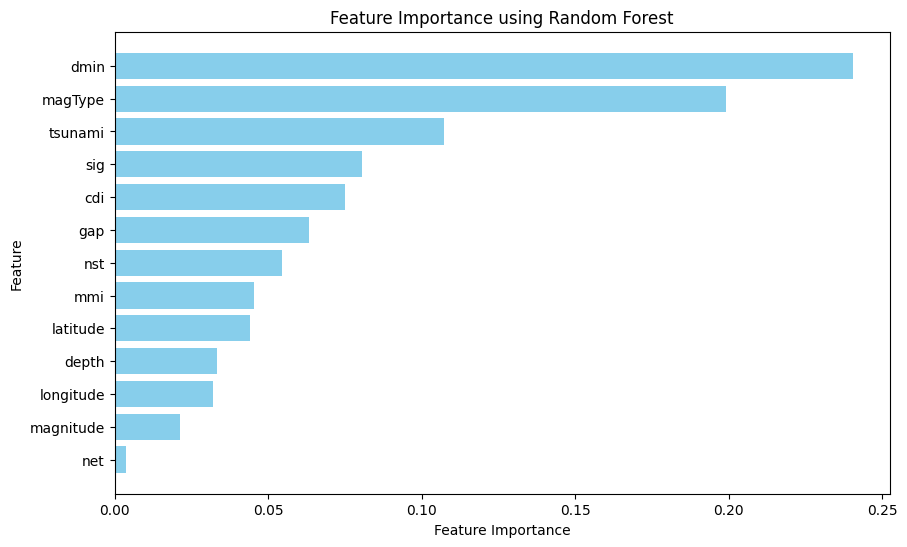

In [16]:
from sklearn.ensemble import RandomForestClassifier  # or RandomForestRegressor for regression tasks
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

# Assuming train_data is your DataFrame and 'alert' is the target column

# Step 1: Separate the features (X) and the target (y)
X = train_data.drop('alert', axis=1)  # Features
y = train_data['alert']  # Target

# Step 2: Split the data into training and testing sets (optional, depending on your use case)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Step 3: Fit a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)  # Use RandomForestRegressor for regression
rf.fit(X_train, y_train)

# Step 4: Get feature importances
feature_importances = rf.feature_importances_

# Step 5: Create a DataFrame for feature importance (for easy visualization)
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Step 6: Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the most important features
print("Most Important Features:")
print(feature_importance_df)

# Step 7: Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance using Random Forest')
plt.gca().invert_yaxis()  # Reverse the order to show the most important feature at the top
plt.show()


In [26]:
Most_imp_feature = list(feature_importance_df["Feature"].unique())[0:6]
Most_imp_feature


['dmin', 'magType', 'tsunami', 'sig', 'cdi', 'gap']

## Model Fitting

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

# Assuming train_data is your DataFrame and 'alert' is the target column

# Step 1: Separate features (X) and target (y)
X = train_data[Most_imp_feature] # Features (drop the target column)
y = train_data['alert']  # Target column

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize the Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)  # n_estimators is the number of trees

# Step 4: Fit the model on the training data
rfc.fit(X_train, y_train)

# Step 5: Make predictions on the test data
y_pred = rfc.predict(X_test)

# Step 6: Evaluate the model
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification Report: Precision, Recall, F1-Score
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9419

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        90
           1       0.95      0.95      0.95        65
           2       1.00      0.20      0.33         5
           3       1.00      0.75      0.86         4
           4       0.55      0.75      0.63         8

    accuracy                           0.94       172
   macro avg       0.90      0.73      0.75       172
weighted avg       0.95      0.94      0.94       172


Confusion Matrix:
[[90  0  0  0  0]
 [ 1 62  0  0  2]
 [ 1  1  1  0  2]
 [ 0  0  0  3  1]
 [ 0  2  0  0  6]]


In [19]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# Assuming 'train_data' is your dataset and 'alert' is the target column
X = train_data[Most_imp_feature]  # Features
y = train_data['alert']  # Target

# Encode labels if necessary (for multiclass)
encoder = LabelEncoder()
y = encoder.fit_transform(y)  # Encode target labels as integers

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE to the training set to handle class imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Convert the training and test data to DMatrix format for XGBoost
dtrain = xgb.DMatrix(X_train_smote, label=y_train_smote)
dtest = xgb.DMatrix(X_test, label=y_test)

# Train the XGBoost model
params = {
    'objective': 'multi:softmax',  # Multiclass classification
    'num_class': len(encoder.classes_),  # Number of classes
    'eval_metric': 'mlogloss'  # Logarithmic loss as evaluation metric
}
bst = xgb.train(params, dtrain, num_boost_round=100)

# Make predictions on the test data
y_pred = bst.predict(dtest)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8837
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       135
           1       0.93      0.80      0.86        99
           2       0.71      0.56      0.62         9
           3       1.00      1.00      1.00         5
           4       0.27      0.70      0.39        10

    accuracy                           0.88       258
   macro avg       0.78      0.81      0.77       258
weighted avg       0.92      0.88      0.90       258

